# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import hypot
from sklearn.cluster import DBSCAN

№0

Точек в 1 кластере: 47
Точек во 2 кластере: 43
Всего точек: 100
Центроид кластера 1: (1.905465993, -2.040851794)
Центроид кластера 2: (-1.030566552, 1.082829348)
Среднее значение по X: 43744.97205
Среднее значение по Y: -47901.122299999995


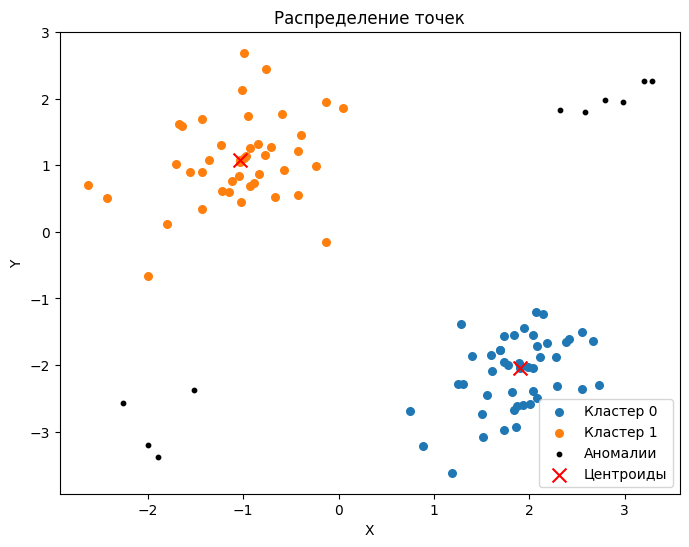

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

with open('0.txt') as file:
    lines = file.readlines()[1:]
    coords = []
    for line in lines:
        clean_line = line.replace('\x00', '').replace(',', '.').strip()
        if clean_line:
            try:
                coords.append(list(map(float, clean_line.split())))
            except ValueError:
                print("Пропущена строка:", clean_line)

points = np.array(coords)


def euclidean_dist(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5


class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit(self, data):
        self.labels = np.full(len(data), -1)
        current_cluster = 0

        for idx in range(len(data)):
            if self.labels[idx] != -1:
                continue

            neighbors = self._region_query(idx, data)
            if len(neighbors) < self.min_samples:
                continue

            self._expand_cluster(idx, neighbors, current_cluster, data)
            current_cluster += 1

        self._assign_outliers(data)

    def _region_query(self, idx, data):
        return [j for j in range(len(data)) if euclidean_dist(data[idx], data[j]) <= self.eps]

    def _expand_cluster(self, idx, neighbors, cluster_id, data):
        self.labels[idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if self.labels[neighbor] == -1:
                self.labels[neighbor] = cluster_id

            new_neighbors = self._region_query(neighbor, data)
            if len(new_neighbors) >= self.min_samples:
                neighbors = list(set(neighbors + new_neighbors))
            i += 1

    def _assign_outliers(self, data):
        for idx in range(len(data)):
            if self.labels[idx] != -1:
                continue
            for cluster_id in set(self.labels):
                if cluster_id == -1:
                    continue
                cluster_pts = data[self.labels == cluster_id]
                if any(euclidean_dist(data[idx], pt) <= self.eps for pt in cluster_pts):
                    self.labels[idx] = cluster_id
                    break


def compute_centroid(cluster):
    best_idx = 0
    min_sum = float('inf')
    for i in range(len(cluster)):
        total = sum(euclidean_dist(cluster[i], cluster[j]) for j in range(len(cluster)))
        if total < min_sum:
            min_sum = total
            best_idx = i
    return tuple(cluster[best_idx])


eps = 1
min_samples = 30

dbscan = DBSCAN(eps, min_samples)
dbscan.fit(points)

cluster1 = points[dbscan.labels == 0]
cluster2 = points[dbscan.labels == 1]

print("Точек в кластере 0:", len(cluster1))
print("Точек в кластере 1:", len(cluster2))
print("Всего точек:", len(points))

cent1 = compute_centroid(cluster1)
cent2 = compute_centroid(cluster2)

print("Центроид кластера 1:", cent1)
print("Центроид кластера 2:", cent2)

avg_x = (cent1[0] + cent2[0]) / 2 * 100000
avg_y = (cent1[1] + cent2[1]) / 2 * 100000

print("Среднее значение X:", avg_x)
print("Среднее значение Y:", avg_y)

plt.figure(figsize=(8, 6))
for cluster_id in set(dbscan.labels):
    cluster_pts = points[dbscan.labels == cluster_id]
    color = 'black' if cluster_id == -1 else None
    label = 'Шум' if cluster_id == -1 else f'Кластер {cluster_id}'
    plt.scatter(cluster_pts[:, 0], cluster_pts[:, 1], label=label, s=30, color=color)

plt.scatter([cent1[0], cent2[0]],
            [cent1[1], cent2[1]],
            color='red', marker='x', s=100, label='Центроиды')

plt.title("DBSCAN кластеризация точек")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Ручками
def find_centroid(cluster):
    min_total = float('inf')
    best_point = (0, 0)
    for i in range(len(cluster)):
        total_dist = 0
        for j in range(len(cluster)):
            dx = cluster[i][0] - cluster[j][0]
            dy = cluster[i][1] - cluster[j][1]
            total_dist += (dx ** 2 + dy ** 2) ** 0.5
        if total_dist < min_total:
            min_total = total_dist
            best_point = (cluster[i][0], cluster[i][1])
    return best_point

cluster_1 = []
cluster_2 = []
points_raw = []
valid_count = total_count = 0

with open('0.txt') as file:
    lines = file.readlines()[1:]
    for line in lines:
        cleaned = line.replace('\x00', '').replace(',', '.').strip()
        if not cleaned:
            continue
        try:
            coords = list(map(float, cleaned.split()))
            points_raw.append(coords)
        except ValueError:
            continue

for point in points_raw:
    x, y = point
    if -3 <= x <= 0.6 and -1 <= y <= 3:
        cluster_1.append(point)
        valid_count += 1
    elif 0.4 <= x <= 3 and -5 <= y <= 0:
        cluster_2.append(point)
        valid_count += 1
    total_count += 1

print("Подходящих точек:", valid_count)
print("Всего точек:", total_count)

cx1, cy1 = find_centroid(cluster_1)
cx2, cy2 = find_centroid(cluster_2)

avg_x = (cx1 + cx2) / 2 * 100000
avg_y = (cy1 + cy2) / 2 * 100000

print("Среднее по X:", avg_x)
print("Среднее по Y:", avg_y)


90 100
43744.97205
-47901.122299999995


№1

Центроид кластера 0: (1.997911354, -1.999164258)
Центроид кластера 1: (2.001614639, 3.998194512)
Центроид кластера 2: (-1.002671154, 1.003715398)
Среднее значение по X: 99895
Среднее значение по Y: 100091


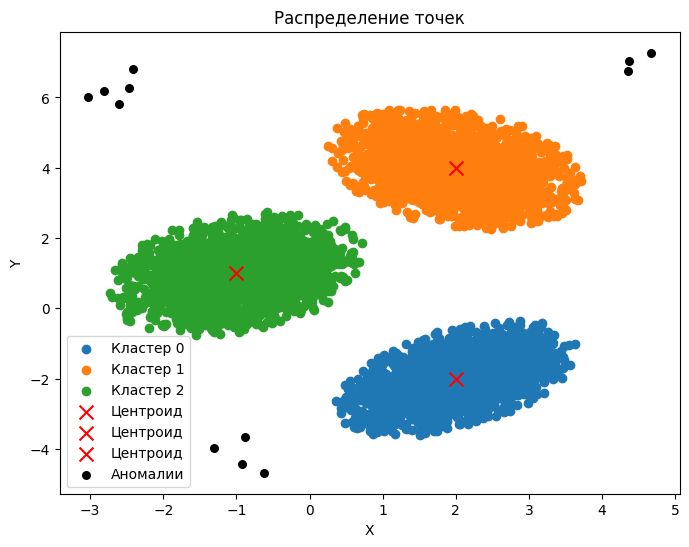

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import hypot

def distance(p1, p2):
    return hypot(p1[0] - p2[0], p1[1] - p2[1])

def find_centroid(cluster):
    best_sum = float('inf')
    best_point = (0, 0)
    for i in range(len(cluster)):
        total = 0
        for j in range(len(cluster)):
            total += distance(cluster[i], cluster[j])
        if total < best_sum:
            best_sum = total
            best_point = cluster[i]
    return best_point

file_path = '1.txt'
points = []

with open(file_path, 'r') as file:
    lines = file.readlines()[1:]
    for line in lines:
        line = line.replace(',', '.').replace('\x00', '').strip()
        if not line:
            continue
        try:
            parts = list(map(float, line.split()))
            if len(parts) == 2:
                points.append(parts)
        except ValueError:
            print("Строка пропущена:", line)

points = np.array(points)

if len(points) == 0:
    print("Ошибка: нет подходящих данных для кластеризации.")
    exit()

eps = 0.8
min_samples = 30
db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(points)

clusters = {}
for idx, label in enumerate(db.labels_):
    if label == -1:
        continue
    clusters.setdefault(label, []).append(points[idx])

centroids = {}
for label, cluster in clusters.items():
    centroids[label] = find_centroid(cluster)

for label, (x, y) in centroids.items():
    print(f"Центроид кластера {label}: ({x}, {y})")

avg_x = sum(x for x, y in centroids.values()) / len(centroids)
avg_y = sum(y for x, y in centroids.values()) / len(centroids)

print("Среднее значение по X:", int(avg_x * 100000))
print("Среднее значение по Y:", int(avg_y * 100000))

plt.figure(figsize=(8, 6))

for label, cluster_points in clusters.items():
    cluster_arr = np.array(cluster_points)
    plt.scatter(cluster_arr[:, 0], cluster_arr[:, 1], label=f'Кластер {label}', s=25)

for x, y in centroids.values():
    plt.scatter(x, y, color='red', marker='x', s=100, label='Центроид')

anomalies = np.array([points[i] for i in range(len(points)) if db.labels_[i] == -1])
if len(anomalies) > 0:
    plt.scatter(anomalies[:, 0], anomalies[:, 1], color='gray', s=20, label='Аномалии')

plt.title('Кластеризация методом DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


№2

Центроид кластера 0: (8.279901088686108, 6.194730492566545)
Центроид кластера 1: (2.0387619757963513, 3.7850114170985236)
Среднее значение по X: 515933
Среднее значение по Y: 498987


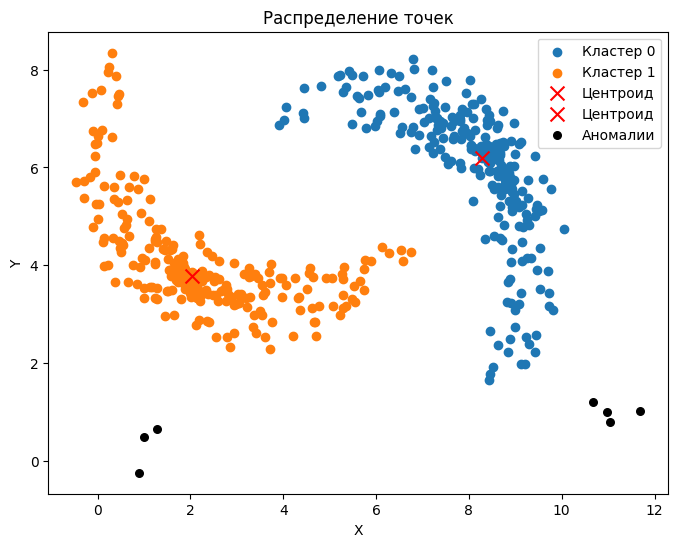

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import hypot


def euclidean_distance(p, q):
    return hypot(p[0] - q[0], p[1] - q[1])


def find_centroid(cluster):
    best_sum = float('inf')
    best_point = (0, 0)
    for i in range(len(cluster)):
        total = 0
        for j in range(len(cluster)):
            total += euclidean_distance(cluster[i], cluster[j])
        if total < best_sum:
            best_sum = total
            best_point = cluster[i]
    return best_point


with open('2.txt') as f:
    points = [list(map(float, line.replace(',', ' ').split())) for line in f.readlines()[1:]]

eps = 1.6
min_samples = 30
db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(points)

clustered_points = [points[i] for i in range(len(points)) if db.labels_[i] != -1]
unique_labels = set(db.labels_)

clusters = {label: [] for label in unique_labels if label != -1}

for i, label in enumerate(db.labels_):
    if label != -1:
        clusters[label].append(points[i])

centroids = {}
for label, cluster in clusters.items():
    centroids[label] = find_centroid(cluster)

for label, (x, y) in centroids.items():
    print(f"Центроид кластера {label}: ({x}, {y})")

mean_x = sum(x for x, y in centroids.values()) / len(centroids)
mean_y = sum(y for x, y in centroids.values()) / len(centroids)

print("Среднее значение по X:", int(mean_x * 100000))
print("Среднее значение по Y:", int(mean_y * 100000))

plt.figure(figsize=(8, 6))

for cluster_id in clusters:
    cluster_points = np.array(clusters[cluster_id])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster_id}')

for (x, y) in centroids.values():
    plt.scatter(x, y, color='red', marker='x', s=100, label='Центроид')

anomalies = np.array([points[i] for i in range(len(points)) if db.labels_[i] == -1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='black', label='Аномалии', s=30)

plt.legend()
plt.title('Распределение точек')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


№3

Центроид кластера 0: (6.0972760336772325, 8.290449940374414)
Центроид кластера 1: (1.696151015672141, 0.12926250793867355)
Центроид кластера 2: (6.338891180086092, 3.8563329929926073)
Среднее значение по X: 471077
Среднее значение по Y: 409201


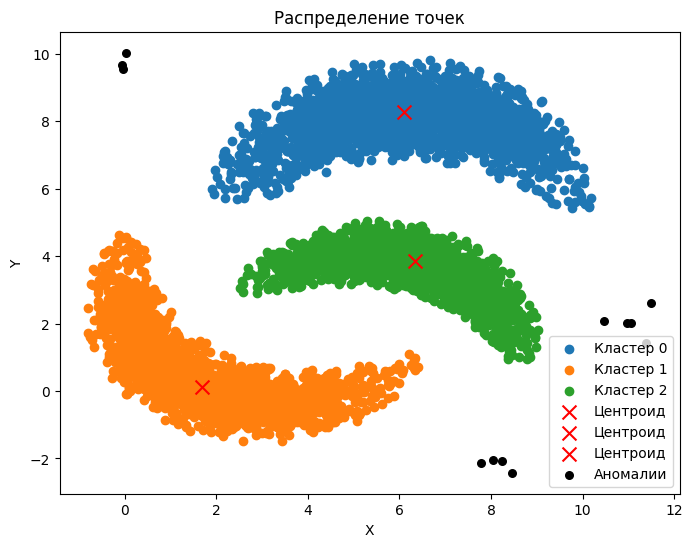

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import hypot


def distance(p, q):
    return hypot(p[0] - q[0], p[1] - q[1])


def find_center(cluster):
    min_sum = float('inf')
    center = (0, 0)
    for i in range(len(cluster)):
        total_dist = 0
        for j in range(len(cluster)):
            total_dist += distance(cluster[i], cluster[j])
        if total_dist < min_sum:
            min_sum = total_dist
            center = cluster[i]
    return center


with open('3.txt') as f:
    points = [list(map(float, line.replace(',', ' ').split())) for line in f.readlines()[1:]]

eps = 1
min_samples = 30
db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(points)

clustered_points = [points[i] for i in range(len(points)) if db.labels_[i] != -1]
unique_labels = set(db.labels_)

clusters = {label: [] for label in unique_labels if label != -1}

for i, label in enumerate(db.labels_):
    if label != -1:
        clusters[label].append(points[i])

centroids = {}
for label, cluster in clusters.items():
    centroids[label] = find_center(cluster)

for label, (x, y) in centroids.items():
    print(f"Центроид кластера {label}: ({x}, {y})")

mean_x = sum(x for x, y in centroids.values()) / len(centroids)
mean_y = sum(y for x, y in centroids.values()) / len(centroids)

print("Среднее значение по X:", int(mean_x * 100000))
print("Среднее значение по Y:", int(mean_y * 100000))

plt.figure(figsize=(8, 6))

for cluster_id in clusters:
    cluster_points = np.array(clusters[cluster_id])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster_id}')

for (x, y) in centroids.values():
    plt.scatter(x, y, color='red', marker='x', s=100, label='Центроид')

anomalies = np.array([points[i] for i in range(len(points)) if db.labels_[i] == -1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='black', label='Аномалии', s=30)

plt.legend()
plt.title('Распределение точек')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


№4

Центроид кластера 0: (6.3167022108860245, 0.004171004482220297)
Центроид кластера 1: (4.244769949421723, 1.4314581166536477)
Среднее значение по X: 528073
Среднее значение по Y: 71781


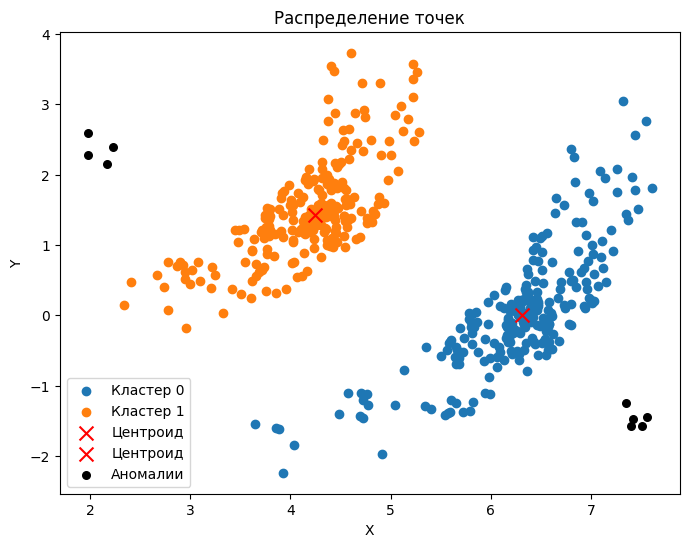

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import hypot


def euclidean_distance(p, q):
    return hypot(p[0] - q[0], p[1] - q[1])


def find_center(cluster):
    min_sum = float('inf')
    center = (0, 0)
    for i in range(len(cluster)):
        total_dist = 0
        for j in range(len(cluster)):
            total_dist += euclidean_distance(cluster[i], cluster[j])
        if total_dist < min_sum:
            min_sum = total_dist
            center = cluster[i]
    return center


with open('4.txt') as f:
    points = [list(map(float, line.replace(',', ' ').split())) for line in f.readlines()[1:]]

eps = 1
min_samples = 30
db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(points)

clustered_points = [points[i] for i in range(len(points)) if db.labels_[i] != -1]
unique_labels = set(db.labels_)

clusters = {label: [] for label in unique_labels if label != -1}

for i, label in enumerate(db.labels_):
    if label != -1:
        clusters[label].append(points[i])

NOISE = -1
for i, label in enumerate(db.labels_):
    if label == NOISE:
        nearest_cluster = None
        min_dist = eps
        for cluster_id, cluster in clusters.items():
            for p in cluster:
                d = euclidean_distance(points[i], p)
                if d < min_dist:
                    min_dist = d
                    nearest_cluster = cluster_id
        if nearest_cluster is not None:
            clusters[nearest_cluster].append(points[i])
            db.labels_[i] = nearest_cluster

centroids = {}
for label, cluster in clusters.items():
    centroids[label] = find_center(cluster)

for label, (x, y) in centroids.items():
    print(f"Центроид кластера {label}: ({x}, {y})")

mean_x = sum(x for x, y in centroids.values()) / len(centroids)
mean_y = sum(y for x, y in centroids.values()) / len(centroids)

print("Среднее значение по X:", int(mean_x * 100000))
print("Среднее значение по Y:", int(mean_y * 100000))

plt.figure(figsize=(8, 6))

for cluster_id in clusters:
    cluster_points = np.array(clusters[cluster_id])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster_id}')

for (x, y) in centroids.values():
    plt.scatter(x, y, color='red', marker='x', s=100, label='Центроид')

anomalies = np.array([points[i] for i in range(len(points)) if db.labels_[i] == -1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='black', label='Аномалии', s=30)

plt.legend()
plt.title('Распределение точек')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


№5

Центроид кластера 0: (3.5836920133304764, 0.9997837352964442)
Центроид кластера 1: (6.632439176008907, 4.29217649571196)
Центроид кластера 2: (9.882268280870775, 5.82908406525797)
Среднее значение по X: 669946
Среднее значение по Y: 370701


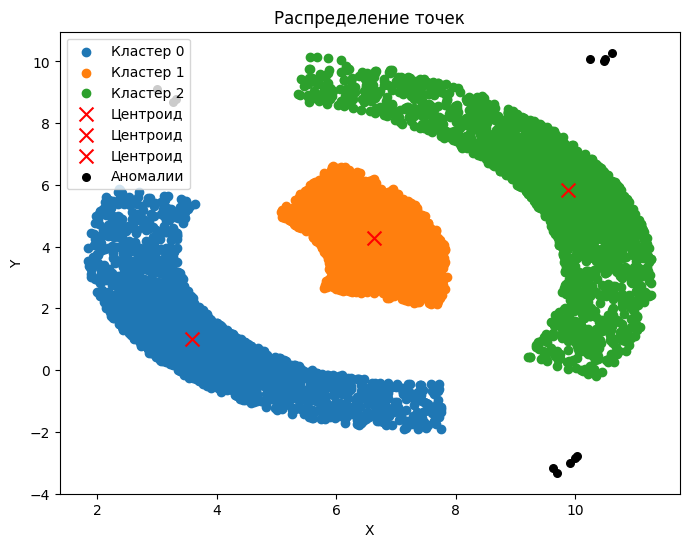

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import hypot


def euclidean_distance(p, q):
    return hypot(p[0] - q[0], p[1] - q[1])


def find_center(cluster):
    min_sum = float('inf')
    center = (0, 0)
    for i in range(len(cluster)):
        total_dist = 0
        for j in range(len(cluster)):
            total_dist += euclidean_distance(cluster[i], cluster[j])
        if total_dist < min_sum:
            min_sum = total_dist
            center = cluster[i]
    return center


with open('5.txt') as f:
    points = [list(map(float, line.replace(',', ' ').split())) for line in f.readlines()[1:]]

eps = 1
min_samples = 30
db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(points)

clustered_points = [points[i] for i in range(len(points)) if db.labels_[i] != -1]
unique_labels = set(db.labels_)

clusters = {label: [] for label in unique_labels if label != -1}

for i, label in enumerate(db.labels_):
    if label != -1:
        clusters[label].append(points[i])

NOISE = -1
for i, label in enumerate(db.labels_):
    if label == NOISE:
        nearest_cluster = None
        min_dist = eps
        for cluster_id, cluster in clusters.items():
            for p in cluster:
                d = euclidean_distance(points[i], p)
                if d < min_dist:
                    min_dist = d
                    nearest_cluster = cluster_id
        if nearest_cluster is not None:
            clusters[nearest_cluster].append(points[i])
            db.labels_[i] = nearest_cluster

centroids = {}
for label, cluster in clusters.items():
    centroids[label] = find_center(cluster)

for label, (x, y) in centroids.items():
    print(f"Центроид кластера {label}: ({x}, {y})")

mean_x = sum(x for x, y in centroids.values()) / len(centroids)
mean_y = sum(y for x, y in centroids.values()) / len(centroids)

print("Среднее значение по X:", int(mean_x * 100000))
print("Среднее значение по Y:", int(mean_y * 100000))

plt.figure(figsize=(8, 6))

for cluster_id in clusters:
    cluster_points = np.array(clusters[cluster_id])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster_id}')

for (x, y) in centroids.values():
    plt.scatter(x, y, color='red', marker='x', s=100, label='Центроид')

anomalies = np.array([points[i] for i in range(len(points)) if db.labels_[i] == -1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='black', label='Аномалии', s=30)

plt.legend()
plt.title('Распределение точек')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =
dbscan =

clustering_algorithms = (
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("OPTICS", optics),
        ("Gaussian\nMixture", gmm),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()